Makine Öğrenmesine Giriş ( Introduction to Machine Learning )

1.örnek


| Metrekare (xi) | Fiyat (yi) |
|----------------|------------|
| 70             | 300        |
| 73             | 310        |
| 75             | 310        |
| 80             | 330        |
| 80             | 340        |
| 80             | 350        |
| 82             | 350        |
| 83             | 400        |
| 85             | 420        |
| 90             | 450        |
| 92             | 450        |
| 94             | 470        |

80 metrekare bir evin fiyatı ne olabilir?
340 br (80 olanların ortalamasını alırız.)
veriye bakarak veri içerisindeki ilişkiyi inceleyerek gözlemlerde bulunuruz ve çıkarımlarda bulunuruz.

**basit doğrusal regresyon yardımıyla bu ilşkiyi modelleyelim.grafikte bulunan kırmızı çizgi ise tahmin fonksiyonudur.**

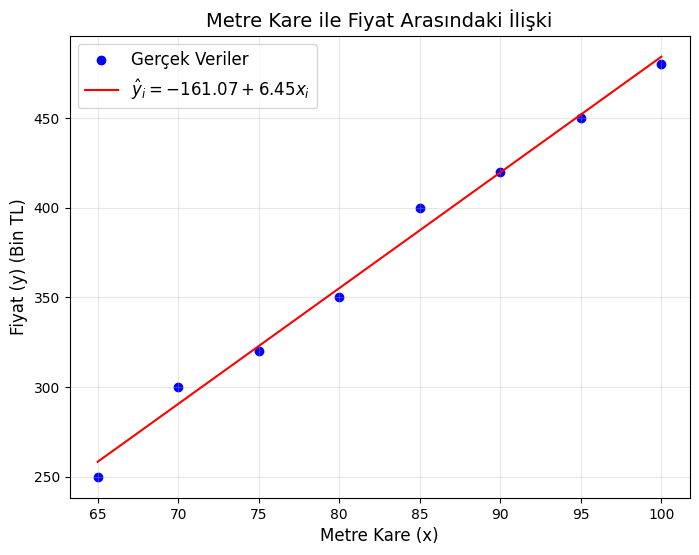

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Veriler
x = np.array([65, 70, 75, 80, 85, 90, 95, 100])
y = np.array([250, 300, 320, 350, 400, 420, 450, 480])

# Doğrusal regresyon çizgisi için katsayılar (örnek olarak alınmıştır)
m, b = np.polyfit(x, y, 1)
y_pred = m * x + b

# Grafiği çiz
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", label="Gerçek Veriler")  # Noktalar
plt.plot(x, y_pred, color="red", label=f"$\hat{{y}}_i = {b:.2f} + {m:.2f}x_i$")  # Regresyon çizgisi

# Grafiğin detayları
plt.title("Metre Kare ile Fiyat Arasındaki İlişki", fontsize=14)
plt.xlabel("Metre Kare (x)", fontsize=12)
plt.ylabel("Fiyat (y) (Bin TL)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

örnek 2
- titanic dataset :
-sınıflandırma problemi-
bağımlı değişkenimiz : 1: hayatta/0: hayatta değil (0-1 ifade edilişi)

İşte tabloyu oluşturdum:

| Survived | Pclass |    Sex   | Age |
|----------|--------|----------|-----|
|    0     |   3    |   male   |  22 |
|    1     |   1    |  female  |  38 |
|    1     |   2    |  female  |  26 |
|    1     |   3    |  female  |  12 |
|    1     |   1    |   male   |  35 |
|    1     |   1    |   male   |  25 |
|    0     |   2    |   male   |  25 |
|    0     |   3    |   male   |  15 |

* 45 yaşında, 3.sınıf ,erkek yolcu hayatta kalabilir mi?
- buna cevabı Lojistik regresyon ile cevap verecek olursak , bağımlı değişkenin kategorik olduğu durumlarda, bir olayın gerçekleşme olasılığını tahmin etmek için kullanılan istatistiksel bir modeldir.

elimizdeki verilere dayalı bir lojistik regresyon modeli oluşturalım:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Veriyi oluştur
data = {
    "Survived": [0, 1, 1, 1, 1, 1, 0, 0],
    "Pclass": [3, 1, 2, 3, 1, 1, 2, 3],
    "Sex": [0, 1, 1, 1, 0, 0, 0, 0],
    "Age": [22, 38, 26, 12, 35, 25, 25, 15],
}

df = pd.DataFrame(data)

# Bağımsız ve bağımlı değişkenleri ayır
X = df[["Pclass", "Sex", "Age"]]
y = df["Survived"]

# Modeli oluştur ve eğit
model = LogisticRegression()
model.fit(X, y)

# Model katsayılarını ve sabiti al
print("Katsayılar:", model.coef_)
print("Sabit (Intercept):", model.intercept_)

# Tahmin yapmak için örnek bir veri (45 yaşında, 3. sınıf, erkek)
sample = np.array([[3, 0, 45]])  # Pclass=3, Sex=0 (male), Age=45
probability = model.predict_proba(sample)[0][1]

print("Hayatta kalma olasılığı:", probability)


Katsayılar: [[-0.65957639  0.83631265  0.05369462]]
Sabit (Intercept): [0.33428739]
Hayatta kalma olasılığı: 0.6839136616355931


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Hayatta Kalma Olasılığı:
45 yaşında, 3. sınıf, erkek bir yolcunun hayatta kalma olasılığı %68.39.

In [50]:
###############################################
# Sales Prediction with Linear Regression
##############################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

######################################################
# Simple Linear Regression with OLS Using Scikit-Learn
######################################################

#from google.colab import files

# Dosya yükleme
#uploaded = files.upload()

# Yüklenen dosyaları listelemek
#for advertising in uploaded.keys():
    ##print(f"Yüklenen dosya: {advertising}")

import os
os.makedirs("datasets", exist_ok=True)

!mv /content/advertising.csv /content/datasets/

df = pd.read_csv("/content/datasets/advertising.csv")
print(df.shape)

df = pd.read_csv("datasets/advertising.csv")
df.shape
df[['TV', 'radio', 'newspaper', 'sales']].head(10)


mv: cannot stat '/content/advertising.csv': No such file or directory
(200, 4)


,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90
5,8.70,48.90,75.00,7.20
6,57.50,32.80,23.50,11.80
7,120.20,19.60,11.60,13.20
8,8.60,2.10,1.00,4.80
9,199.80,2.60,21.20,10.60


In [51]:
x = df[['TV']]
y = df[['sales']]

In [55]:
##########################
# Model
##########################

reg_model = LinearRegression().fit(X, y)

# y_hat = b + w.x x -> burada tv
# b(sabit) = intercept_
# w(katsayı) = coef_
reg_model.intercept_[0]
reg_model.coef_[0][0]
# reg_model.intercept_[0] + reg_model.coef_[0][0].tv


0.04753664043301975

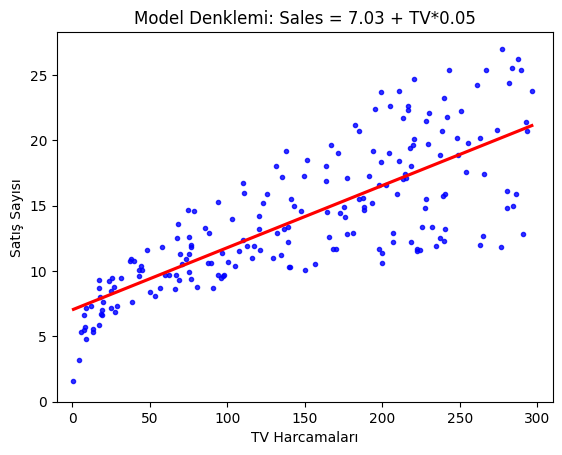

In [56]:
##########################
# Tahmin
##########################

# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?

reg_model.intercept_[0] + reg_model.coef_[0][0]*150

# 500 birimlik tv harcaması olsa ne kadar satış olur?

reg_model.intercept_[0] + reg_model.coef_[0][0]*500

df.describe().T


# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

MSE ve MAE Başarı Tahmini

In [75]:
##########################
# Tahmin Başarısı
##########################

# MSE
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)
# 10.51
y.mean()
y.std()

# RMSE
np.sqrt(mean_squared_error(y, y_pred))
# 3.24

# MAE
mean_absolute_error(y, y_pred)
# 2.54

# R-KARE
reg_model.score(X, y)



0.8961873957589406

In [79]:
######################################################
# Multiple Linear Regression
######################################################

df = pd.read_csv("datasets/advertising.csv")

X = df.drop('sales', axis=1)

y = df[["sales"]]

##########################
# Model
##########################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

y_test.shape
y_train.shape

reg_model = LinearRegression().fit(X_train, y_train)

# sabit (b - bias)
reg_model.intercept_

# coefficients (w - weights)
reg_model.coef_

#array([[0.0468431 , 0.17854434, 0.00258619]])#




array([[0.0468431 , 0.17854434, 0.00258619]])

In [87]:
##########################
# Tahmin
##########################

# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

# TV: 30
# radio: 10
# newspaper: 40

# 2.90
# 0.0468431 , 0.17854434, 0.00258619
# Sales = 2.90  + TV * 0.04 + radio * 0.17 + newspaper * 0.002

2.90 + 30 * 0.04 + 10 * 0.17 + 40 * 0.002

yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

reg_model.predict(yeni_veri)
#array([[6.202131]])#



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.202131]])

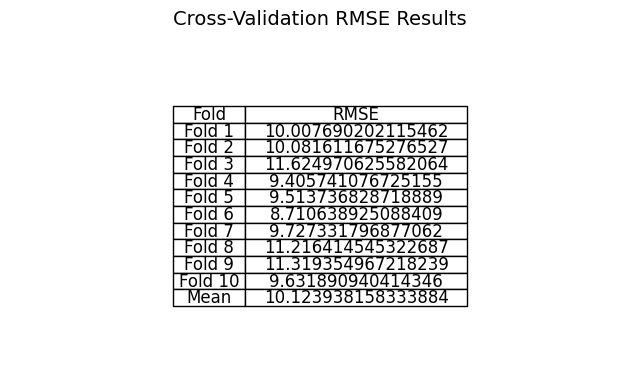

In [95]:
##########################
# Tahmin Başarısını Değerlendirme
##########################

# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))
# 1.73

# TRAIN RKARE
reg_model.score(X_train, y_train)  #0.89

# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# 1.41

# Test RKARE
reg_model.score(X_test, y_test)
#0.89 açıklama yüzdesi

np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Örnek veri oluştur (veya kendi verini yükleyebilirsin)
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)

# Modeli tanımla
reg_model = LinearRegression()

# Çapraz doğrulama sonuçlarını al
scores = -cross_val_score(reg_model, X, y, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(scores)

# Skorları bir DataFrame olarak hazırla
cv_results = pd.DataFrame({
    "Fold": [f"Fold {i+1}" for i in range(len(rmse_scores))],
    "RMSE": rmse_scores
})

# Ortalama RMSE
mean_rmse = np.mean(rmse_scores)
cv_results.loc[len(cv_results)] = ["Mean", mean_rmse]  # Ortalama ekle

# Tabloyu görselleştir
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=cv_results.values, colLabels=cv_results.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(cv_results.columns))))

plt.title("Cross-Validation RMSE Results", fontsize=14, pad=20)
plt.show()



In [96]:
# 5 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))
# 10.14

10.144630284426373

In [98]:
######################################################
# Simple Linear Regression with Gradient Descent from Scratch
######################################################

# Cost function MSE
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m
    return mse

# update_weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w

# train fonksiyonu
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w


df = pd.read_csv("datasets/advertising.csv")

X = df["radio"]
Y = df["sales"]

# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 100000

cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)




